In [1]:
import requests
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [2]:
api_url = 'https://dhm.agiv.be/api/elevation/v1'

In [3]:

headers = {'Content-type': 'application/xml'}
response = requests.get(api_url, headers=headers)

In [4]:
response.content

b'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <meta name="viewport" content="width=device-width" />\r\n    <title>Elevation Service Web API Help Page</title>\r\n    \r\n</head>\r\n<body>\r\n    \r\n\r\n<link type="text/css" href="/api/elevation/Areas/HelpPage/HelpPage.css" rel="stylesheet" />\r\n<header class="help-page">\r\n    <div class="content-wrapper">\r\n        <div class="float-left">\r\n            <h1>Elevation Service Web API Help Page</h1>\r\n        </div>\r\n    </div>\r\n</header>\r\n<div id="body" class="help-page">\r\n    <section class="featured">\r\n        <div class="content-wrapper">\r\n            <h2>Introduction</h2>\r\n            <p>\r\n                The RESTful elevation service allows you to retrieve the height of geographical locations. Several datasets are available,\r\n                each with their own resource. The easiest way to query for data is by launching a standard HTTP GET request. \r\n                Several p

In [6]:
post_url = "https://dhm.agiv.be/api/elevation/v1/DHMVMIXED/request"

In [7]:
json = {
    "Samples": 30,
    "SrsIn": 31370,
    "SrsOut": 31370,
    "LineString": {}
}

In [8]:
xml = f"""
<Query xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <Samples>30</Samples>
  <SrsIn>31370</SrsIn>
  <SrsOut>31370</SrsOut>
  <LineString xmlns="http://www.opengis.net/gml">
    <posList>133630.81 200349.78 133631.16 200461.03 133771.21 200460.59</posList>
  </LineString>
</Query>
"""

In [9]:
headers = {'Content-type': 'application/xml'}

In [10]:
response = requests.post(post_url, xml, headers=headers)

In [11]:
response.json()

[[0.0, 133630.81, 200349.78, 10.55],
 [8.66556006001514, 133630.8372623012, 200358.4455171756, 10.9],
 [17.33112012003028, 133630.86452460245, 200367.11103435123, 11.14],
 [25.996680180045423, 133630.89178690367, 200375.77655152683, 11.35],
 [34.66224024006056, 133630.9190492049, 200384.4420687024, 11.81],
 [43.3278003000757, 133630.94631150615, 200393.107585878, 12.02],
 [51.99336036009084, 133630.97357380734, 200401.77310305362, 12.09],
 [60.65892042010598, 133631.00083610858, 200410.4386202292, 12.06],
 [69.32448048012112, 133631.02809840982, 200419.10413740482, 12.14],
 [77.99004054013626, 133631.05536071103, 200427.76965458042, 12.75],
 [86.6556006001514, 133631.08262301228, 200436.43517175602, 12.76],
 [95.32116066016654, 133631.1098853135, 200445.10068893165, 12.84],
 [103.98672072018168, 133631.1371476147, 200453.76620610722, 13.02],
 [112.65228078019682, 133632.56172330194, 200461.0255961567, 13.14],
 [121.31784084021196, 133641.22724059556, 200460.9983713969, 13.1],
 [129.983

In [12]:
# use a formatted string to get the result

def formatXmlRequest(steps, x1, y1, x2, y2):
    
    return f"""
    <Query xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
      <Samples>{steps}</Samples>
      <SrsIn>31370</SrsIn>
      <SrsOut>31370</SrsOut>
      <LineString xmlns="http://www.opengis.net/gml">
        <posList>{x1} {y1} {x2} {y2}</posList>
      </LineString>
    </Query>
    """

In [31]:
post_url = "https://dhm.agiv.be/api/elevation/v1/DHMVMIXED/request"

# Would you look at that!
# The logic would be to do it like this: 

"""
1-1-1-1-1-1-1-1
2-2-2-2-2-2-2-2
3-3-3-3-3-3-3-3
4-4-4-4-4-4-4-4
5-5-5-5-5-5-5-5
6-6-6-6-6-6-6-6
"""

# each line represents a request made with the most left and the most right coordinates as input.
# each request uses n samples that correspond with the amount of measurements of each line.
# each new request forms a new line, which can be stored in a numpy array.
# This numpy array is used to plot a surface map.

# gather coordinates (x,y)
house_crds = (155664.96, 211764.30) 

# calculate cropped plot size 
house_crop_size = [house_crds[0]-100, house_crds[0]+100, house_crds[1]-100, house_crds[1]+100]
x1 = house_crds[0] - 50
x2 = house_crds[0] + 50
y1 = house_crds[1] - 50
y2 = house_crds[1] + 50

xml = formatXmlRequest(100, x1, y1, x2, y1)


In [32]:
response = requests.post(post_url, xml, headers=headers)

In [33]:
result = response.json()
result

[[0.0, 155614.96, 211714.3, -2.4],
 [1.0101010101010102, 155615.9701010101, 211714.3, -2.4],
 [2.0202020202020203, 155616.98020202018, 211714.3, -2.4],
 [3.0303030303030303, 155617.9903030303, 211714.3, -2.28],
 [4.040404040404041, 155619.0004040404, 211714.29999999996, -2.28],
 [5.050505050505051, 155620.0105050505, 211714.30000000002, -2.28],
 [6.060606060606061, 155621.02060606057, 211714.3, -2.28],
 [7.070707070707072, 155622.0307070707, 211714.3, -2.28],
 [8.080808080808081, 155623.04080808078, 211714.3, -2.13],
 [9.090909090909092, 155624.0509090909, 211714.3, -2.13],
 [10.101010101010102, 155625.061010101, 211714.3, -2.13],
 [11.111111111111112, 155626.0711111111, 211714.3, -2.13],
 [12.121212121212123, 155627.0812121212, 211714.3, -2.13],
 [13.131313131313133, 155628.0913131313, 211714.3, -2.0],
 [14.141414141414144, 155629.10141414142, 211714.3, -2.0],
 [15.151515151515154, 155630.11151515148, 211714.3, -2.0],
 [16.161616161616163, 155631.1216161616, 211714.3, -2.0],
 [17.1717

In [34]:
result[0][-1]

-2.4

In [35]:
cropped = []

for z in range(100):
    heights = []
    xml = formatXmlRequest(100, x1, y1+z, x2, y1+z)
    response = requests.post(post_url, xml, headers=headers)
    result = response.json()
    
    for row in result:
        height = row[-1]
        heights.append(height)
    
    cropped.append(heights)
    

In [36]:
type(cropped)

list

In [37]:
npa = np.asarray(cropped, dtype=np.float32)

In [38]:
npa

array([[-2.4 , -2.4 , -2.4 , ...,  0.83,  0.83,  0.83],
       [-2.4 , -2.4 , -2.4 , ...,  0.83,  0.83,  0.83],
       [-2.4 , -2.4 , -2.4 , ...,  0.83,  0.83,  0.83],
       ...,
       [ 7.07,  7.07,  7.07, ...,  2.  ,  2.  ,  2.  ],
       [ 7.07,  7.07,  7.07, ...,  2.  ,  2.  ,  2.  ],
       [ 5.61,  5.61,  5.61, ...,  1.19,  1.19,  1.19]], dtype=float32)

<IPython.core.display.Javascript object>


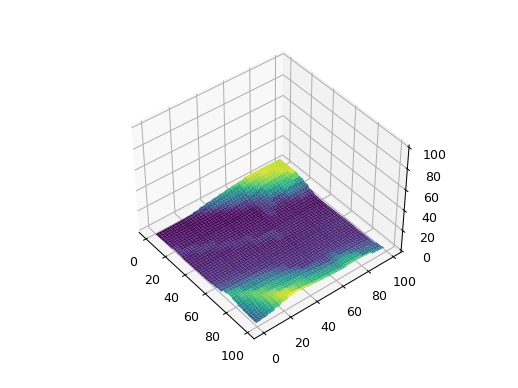

In [39]:
# unpack the shape into x and y coordinates
n, m = npa.shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure of a certain size
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

# change ticks on z-axis
ax.set_zlim(0, 100)

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, npa, cmap='viridis')

# change background color.
ax.set_facecolor('white')
plt.show()

In [ ]:
# even though this is beatifully done, the API does not grant access to the DSM, but only to the DTM.
# This sort of kills the whole idea, and I would still have to download everything manually.